In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocesing

In [6]:
data.shape

(7920, 3)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing


In [12]:
import re
import string

In [14]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase


In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [20]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [22]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\home\AppData\Local\Temp\ipykernel_9240\425538495.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [23]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\home\AppData\Local\Temp\ipykernel_9240\425538495.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [24]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [25]:
!pip install nltk

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.9 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)

   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------------------- ------------------- 2/4 [click]
   -------------------- ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk

In [27]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [29]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [31]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming


In [32]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [33]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [34]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [35]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Buidling Vocabulary

In [43]:
from collections import Counter
vocab = Counter()

In [44]:
vocab

Counter()

In [45]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [46]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [54]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [56]:
len(vocab)

15949

In [57]:
data.shape

(7920, 3)

In [58]:
tokens = [key for key in vocab if vocab[key] > 10]

In [59]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [60]:
len(tokens)

1145

In [61]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [62]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [63]:
X = data['tweet']
y = data['label']

In [64]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 4.9 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/38.5 MB 8.2 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/38.5 MB 9.3 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/38.5 MB 9.8 MB/s eta 0:00:04
   ---------- ----------------------------- 9.7/38.5 MB 9.9 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.5 MB 10.0 MB/s eta 0:00:03
   -------------- ------------------------- 13.9/38.5 MB 10.1 MB/s eta 0:00:03
   ---------------- ----------------------- 16.3/38.5 MB 10.1 MB/s eta 0:00:03
   ------------------- -------------------- 18.4/38.5 MB 10.2 MB/s eta 0:00:02
   -------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
X_train

7430          ever wonder would look like shot burn iphon
1253    michel came home tcot nascar theater movi sing...
4233    christma atmospher rome sundaymorn rome christ...
2610    owner dog australianshepherd bordercolli mix i...
6313    gain follow rt must follow follow back follow ...
                              ...                        
2649    input tablet phone hateappl help microsoft sur...
5146    fuck hate appl crappi compani ipod wont open b...
4371    love new iphon case iphon case shine black lik...
741     bow bridg central park nyc ny nyc newyork newy...
4503    earlier phone didnt enough batteri life updat ...
Name: tweet, Length: 6336, dtype: object

In [71]:
X_test

4623      serious samsung guy pathet respons day timesnow
1934    well hello new phone nice meet soni xperiaz so...
7889              oki phone die like two minut cool iphon
2983    spent freakin buck iphon charger mine stop wor...
4134    mail new cover samsung phone ilovepink pink po...
                              ...                        
7095    sunpoli soon news game gamedev game art videog...
4728    windowwwww ryanbeatti delco iphon instap cali ...
6587    gain follow rt must follow follow back follow ...
4679    new laptop hello sexi im pc guy soni laptop ne...
6414    photo raffl winner samsung galaxi ticket beabo...
Name: tweet, Length: 1584, dtype: object

In [70]:
y_train

7430    0
1253    0
4233    0
2610    0
6313    0
       ..
2649    1
5146    1
4371    0
741     0
4503    1
Name: label, Length: 6336, dtype: int64

In [73]:
y_test

4623    1
1934    0
7889    1
2983    1
4134    0
       ..
7095    0
4728    0
6587    0
4679    0
6414    0
Name: label, Length: 1584, dtype: int64

### Vectorization

In [74]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [75]:
vectorized_x_train = vectorizer(X_train, tokens)

In [76]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [77]:
vectorized_x_test = vectorizer(X_test, tokens)

In [78]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [79]:
y_train

7430    0
1253    0
4233    0
2610    0
6313    0
       ..
2649    1
5146    1
4371    0
741     0
4503    1
Name: label, Length: 6336, dtype: int64

In [80]:
y_test

4623    1
1934    0
7889    1
2983    1
4134    0
       ..
7095    0
4728    0
6587    0
4679    0
6414    0
Name: label, Length: 1584, dtype: int64

In [82]:
y_train.value_counts()

label
0    4726
1    1610
Name: count, dtype: int64

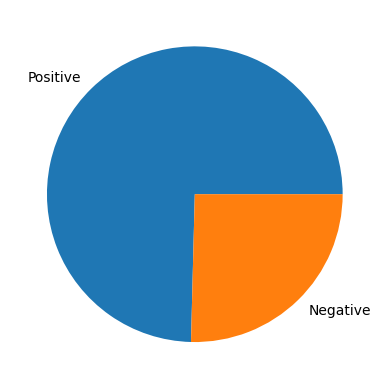

In [83]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalance dataset

In [84]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9452, 1145) (9452,)


In [87]:
y_train_smote.value_counts()

label
0    4726
1    4726
Name: count, dtype: int64

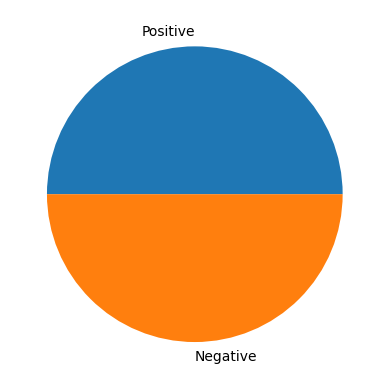

In [88]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [89]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9452, 1145), dtype=float32)

In [90]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9447    1
9448    1
9449    1
9450    1
9451    1
Name: label, Length: 9452, dtype: int64

In [91]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [92]:
y_test

4623    1
1934    0
7889    1
2983    1
4134    0
       ..
7095    0
4728    0
6587    0
4679    0
6414    0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [96]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [97]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.911
	Recall = 0.971
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.87
	Precision = 0.714
	Recall = 0.841
	F1-Score = 0.773


## Naive Bayes


In [109]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.87
	Recall = 0.956
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.871
	Precision = 0.694
	Recall = 0.909
	F1-Score = 0.787


### Decision Tree

In [111]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.838
	Precision = 0.699
	Recall = 0.671
	F1-Score = 0.685


### Random Forest

In [112]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.862
	Precision = 0.756
	Recall = 0.702
	F1-Score = 0.728


### Support Vector Machine

In [114]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.995
	F1-Score = 0.977
Testing Scores:
	Accuracy = 0.879
	Precision = 0.756
	Recall = 0.798
	F1-Score = 0.777


In [115]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)